In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/agent_based_sim")
from multi_agent_sim import MultiAgentSim

In [2]:
def run_trajectories(infectivity_alpha, nreps=5, max_infections=200):
    nreps = 5
    T = 12 * 7
    max_infections = 200
    infection_counts = {}
    for rep in range(nreps):
        sim = MultiAgentSim(n_agents=1000, init_infection_p = 0.005, infectivity_alpha = infectivity_alpha)
        infection_counts[rep] = [len(sim.get_infected_agents())]
        for t in range(T):
            sim.step(t)
            infection_counts[rep].append(len(sim.get_infected_agents()))
            if infection_counts[rep][-1] >= max_infections:
                break
        print("done rep # {}".format(rep))
    return infection_counts

In [4]:
alphas_to_try = [0.1, 0.2, 0.3, 0.4, 0.5]
results = {}
for alpha in alphas_to_try:
    results[alpha] = run_trajectories(alpha)
    print("done alpha {}".format(alpha))

done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done alpha 0.1
done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done alpha 0.2
done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done alpha 0.3
done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done alpha 0.4
done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done alpha 0.5


In [5]:
more_alphas_to_try = [0.75, 1]
for alpha in more_alphas_to_try:
    results[alpha] = run_trajectories(alpha)
    print("done alpha {}".format(alpha))

done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done alpha 0.75
done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done alpha 1


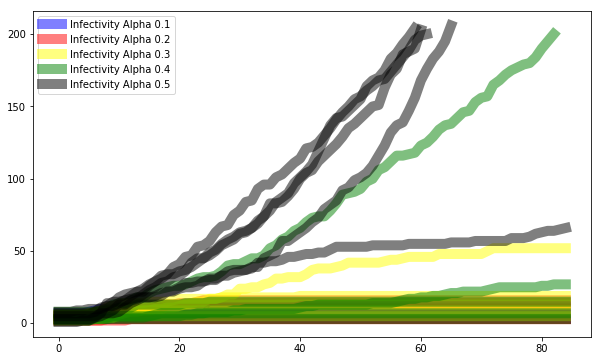

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

colours = ['blue', 'red', 'yellow', 'green', 'black', 'orange', 'purple']
colour_idx = 0
plt.figure(figsize=(10,6))
for alpha in alphas_to_try:
    include_legend = True
    colour = colours[colour_idx]
    for trajectory in results[alpha].values():
        xs = list(range(len(trajectory)))
        if include_legend:
            plt.plot(xs, trajectory, alpha=0.5, linewidth=10, label="Infectivity Alpha {}".format(alpha), color=colour)
            include_legend = False
        else:
            plt.plot(xs, trajectory, alpha=0.5, linewidth=10, color=colour)
    
    colour_idx += 1
plt.legend(loc='best')
plt.show()

In [8]:
sim = MultiAgentSim(n_agents=1000, init_infection_p = 0.005, infectivity_alpha = 0.4)
sim.agents[0].infection.forward_gen_time_density

array([0.00000000e+00, 7.29919908e-05, 3.43708836e-03, 2.16040428e-02,
       5.95403938e-02, 1.04444918e-01, 1.37677050e-01, 1.49002858e-01,
       1.39586605e-01, 1.17116186e-01, 9.00792729e-02, 6.45771964e-02,
       4.36822128e-02, 2.81413477e-02, 1.73917464e-02, 1.03702989e-02,
       5.99373944e-03, 3.37059016e-03, 1.85002055e-03, 9.93687305e-04,
       5.23467861e-04, 2.70969640e-04, 1.38054273e-04, 6.93252524e-05,
       3.43542773e-05, 1.68185172e-05, 8.14191562e-06, 3.90090190e-06,
       1.85110229e-06, 8.70594063e-07])

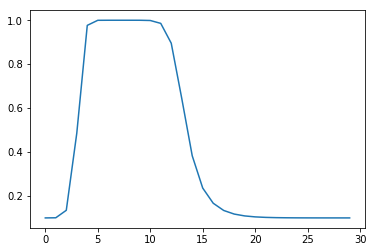

In [43]:
from math import exp
def get_detectability(viral_load):
    # viral load between 0 and 1
    return 1 / (1 +  1.25 * exp(-100 * (viral_load - 0.02)))

detectability = [get_detectability(x) for x in sim.agents[0].infection.forward_gen_time_density]
plt.plot(list(range(30)), detectability)

In [31]:
sorted([1,2,3])

[1, 2, 3]